In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet
with open('/content/spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df= pd.read_csv('/content/spam.csv',encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df1=pd.DataFrame(df)

In [7]:
print(df1.columns)

Index(['v1', 'v2'], dtype='object')


In [8]:
df1.columns=df1.columns.str.replace('v1','Spam_or_Ham')
df1.columns=df1.columns.str.replace('v2','Email_Content')

In [9]:
df1.head(5)

,Spam_or_Ham,Email_Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df1.describe()

,Spam_or_Ham,Email_Content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df1.isna().sum()

Spam_or_Ham      0
Email_Content    0
dtype: int64

In [13]:
df1.Spam_or_Ham[0]

'ham'

In [14]:
df1.Spam_or_Ham.value_counts()

ham     4825
spam     747
Name: Spam_or_Ham, dtype: int64

In [15]:
df1.Email_Content[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
df1.Email_Content.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [17]:
from gensim.utils import simple_preprocess

In [18]:
preprocessed_data = df1.Email_Content.apply(lambda x:simple_preprocess(x))

In [19]:
preprocessed_data[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [20]:
from gensim.models import Word2Vec
from nltk import word_tokenize

In [21]:
#creating CBOW model using the given data
cbow_w2v_model=Word2Vec(preprocessed_data,size=300,window=9,min_count=2,sg=0)

In [22]:
#creating skipgram model using the given data
skgram_w2v_model=Word2Vec(preprocessed_data,size=300,window=9,min_count=2,sg=0)

In [23]:
print('cbow mobel vocabulary size:',len(cbow_w2v_model.wv.vocab))
print('skgram mobel vocabulary size:',len(skgram_w2v_model.wv.vocab))

cbow mobel vocabulary size: 3892
skgram mobel vocabulary size: 3892


In [24]:
list(cbow_w2v_model.wv.vocab.items())[:20]

[('go', <gensim.models.keyedvectors.Vocab at 0x7f1b56def590>),
 ('until', <gensim.models.keyedvectors.Vocab at 0x7f1b56def5d0>),
 ('point', <gensim.models.keyedvectors.Vocab at 0x7f1b56def610>),
 ('crazy', <gensim.models.keyedvectors.Vocab at 0x7f1b56def650>),
 ('available', <gensim.models.keyedvectors.Vocab at 0x7f1b56def6d0>),
 ('only', <gensim.models.keyedvectors.Vocab at 0x7f1b56def750>),
 ('in', <gensim.models.keyedvectors.Vocab at 0x7f1b56def790>),
 ('bugis', <gensim.models.keyedvectors.Vocab at 0x7f1b56def7d0>),
 ('great', <gensim.models.keyedvectors.Vocab at 0x7f1b56def690>),
 ('world', <gensim.models.keyedvectors.Vocab at 0x7f1b56def710>),
 ('la', <gensim.models.keyedvectors.Vocab at 0x7f1b56def810>),
 ('buffet', <gensim.models.keyedvectors.Vocab at 0x7f1b56def850>),
 ('cine', <gensim.models.keyedvectors.Vocab at 0x7f1b56def890>),
 ('there', <gensim.models.keyedvectors.Vocab at 0x7f1b56def8d0>),
 ('got', <gensim.models.keyedvectors.Vocab at 0x7f1b56def910>),
 ('wat', <gensim.m

In [25]:
cbow_w2v_model.wv.get_vector('warning')

array([ 5.07881911e-03, -4.07899637e-03, -8.65479372e-03,  1.40704755e-02,
        5.96940052e-03, -5.27991867e-03,  9.72365867e-03, -2.28675199e-03,
       -9.75131430e-03, -9.67308224e-05,  3.68707697e-03,  6.84811035e-03,
       -5.89092635e-03, -5.43424487e-03, -1.18027171e-02, -1.00307595e-02,
       -5.75229479e-03,  6.19048532e-03, -6.74755196e-04, -2.31619412e-03,
       -9.87411244e-04, -4.96617705e-03, -9.36332275e-04,  6.35030353e-03,
       -9.53284744e-03,  8.35890044e-03, -5.25319623e-03,  7.72900926e-03,
       -2.38593086e-03,  6.13863254e-03, -3.52918723e-04,  2.95437849e-03,
       -1.10920733e-02, -2.78213520e-05,  1.84757379e-03,  1.07557315e-03,
       -1.74737803e-03,  1.35328844e-02, -8.70634336e-03,  5.11857308e-03,
       -1.90251565e-03, -9.97914188e-03,  1.14482529e-02,  1.63186443e-04,
       -3.51045374e-03,  6.93915572e-05,  2.24053953e-03, -5.60374185e-03,
        6.28269801e-04,  7.03044643e-05,  1.08044818e-02,  7.28697004e-03,
       -2.11903406e-03,  

In [26]:
cbow_w2v_model.wv.get_vector('warning').shape

(300,)

In [27]:
cbow_w2v_model.wv.most_similar('free')

[('nokia', 0.999913215637207),
 ('mobile', 0.9999008178710938),
 ('txt', 0.9998394250869751),
 ('tone', 0.999815821647644),
 ('call', 0.9998157620429993),
 ('update', 0.9997853636741638),
 ('claim', 0.999770998954773),
 ('stop', 0.9997614622116089),
 ('cash', 0.9997563362121582),
 ('reply', 0.999707818031311)]

In [28]:
skgram_w2v_model.wv.most_similar('reply')

[('www', 0.9999611973762512),
 ('stop', 0.999954879283905),
 ('text', 0.9999525547027588),
 ('or', 0.9999484419822693),
 ('week', 0.9999424815177917),
 ('latest', 0.999941349029541),
 ('entry', 0.9999356269836426),
 ('co', 0.9999349117279053),
 ('cs', 0.9999347925186157),
 ('sms', 0.9999310970306396)]

In [29]:
import matplotlib.pyplot as pyplot
from sklearn.decomposition import PCA

In [30]:
#plotting w2v emmbeding of given sords list using cbow model
def plot_cbow_w2v(word_list):
  X=cbow_w2v_model[word_list]

  #reducing dimension to 2
  pca =PCA(n_components=2)
  result=pca.fit_transform(X)

  #creating a scatter plot of the projection
  pyplot.scatter(result[:, 0],result[:, 1])
  for i , word in enumerate(word_list):
   pyplot.annotate(word, xy={result[i,0],result[i,1]})
     
  #show
  pyplot.figure(figsize=(6,15))
  pyplot.show()

In [31]:
#plotting w2v emmbeding of given sords list using skipgram model
def plot_skgram_w2v(word_list):
  X=skgram_w2v_model[word_list]

  #reducing dimension to 2
  pca =PCA(n_components=2)
  result=pca.fit_transform(X)

  #creating a scatter plot of the projection
  pyplot.scatter(result[:, 0],result[:, 1])
  for i , word in enumerate(word_list):
    pyplot.annotate(word, xy={result[i,0],result[i,1]})

  #show
  pyplot.figure(figsize=(6,15))
  pyplot.show()

In [32]:
#generate similar word list using cbow and skgram models
words_text_cb=cbow_w2v_model.wv.most_similar('text')
words_call_cb=cbow_w2v_model.wv.most_similar('call')
words_prize_cb=cbow_w2v_model.wv.most_similar('prize')

In [33]:
#combine these words list
words_cb=words_text_cb+words_call_cb+words_prize_cb
words_cb=list(map(lambda x: x[0],words_cb))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


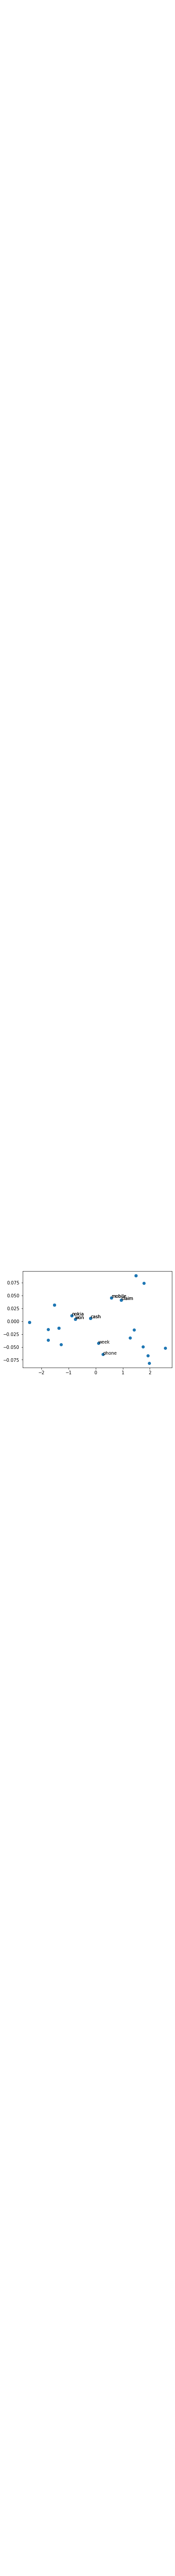

<Figure size 432x1080 with 0 Axes>

In [34]:
plot_cbow_w2v(words_cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


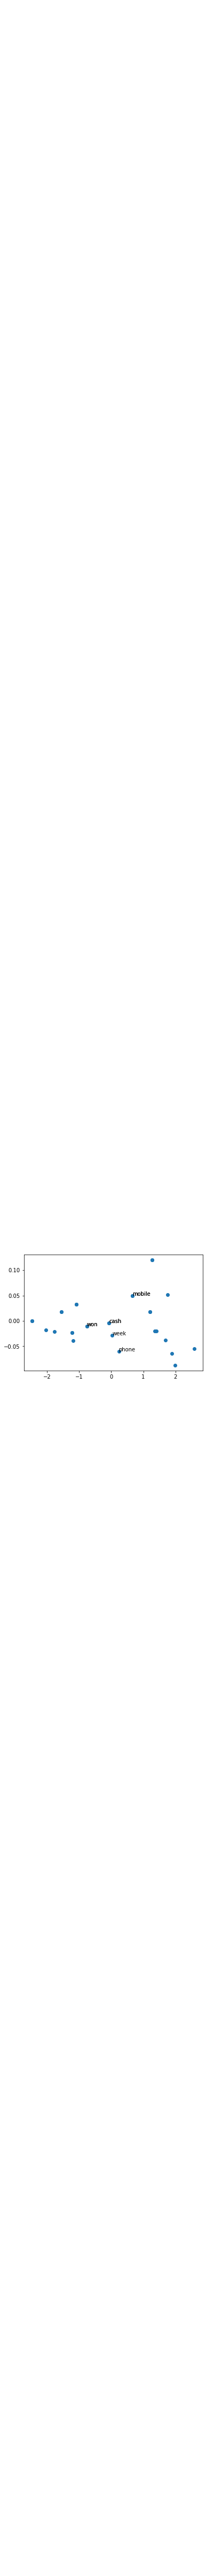

<Figure size 432x1080 with 0 Axes>

In [35]:
plot_skgram_w2v(words_cb)

In [36]:
file_name="/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz"

In [37]:
#importing pre trained model
from gensim.models import KeyedVectors

In [38]:
google_w2vec= KeyedVectors.load_word2vec_format(file_name, binary=True)

In [39]:
# extraction of vectors of all wors in data
from gensim.models.doc2vec import train_document_dm_concat
def get_embedding_w2v(doc_tokens, pre_trained):
  embeddings=[]
  # if pre trained=1 uses googles model or else uses our own
  if pre_trained:
     model=google_w2vec
  else:
     model=cbow_w2v_model
  # itrate over tokens to extract their vectors
  for tok in doc_tokens:
      if tok in model.wv.vocab:
        embeddings.append(model.wv.word_vec(tok))
  # mean the vectors of individual words to get the vector of the statement
  return np.mean(embeddings)

In [40]:
# label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [41]:
# create X from w2vec 
X_w2v_model= preprocessed_data.apply(lambda x: get_embedding_w2v(x, pre_trained=1))
X_w2v_model= pd.DataFrame(X_w2v_model.tolist())
print('X shape:',X_w2v_model.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


X shape: (5572, 1)


In [46]:
X_w2v_model.describe()

,0
count,5563.000000
mean,-0.002381
std,0.002824
min,-0.023805
25%,-0.004024
50%,-0.002290
75%,-0.000689
max,0.009314


In [48]:
X_w2v_model.isna().sum()

0    9
dtype: int64

In [42]:
# label encode 
labelencode=LabelEncoder()
# fit and transform 
df1.Spam_or_Ham=labelencode.fit_transform(df1.Spam_or_Ham)

# split into train and test
y=df1.Spam_or_Ham
X_train_wm,X_test_wm, y_train_wm,y_test_wm= train_test_split(X_w2v_model,y,test_size=0.2,random_state=42)

In [43]:
# build atext classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
X_train_wm = X_train_wm.fillna(X_train_wm.mean())
y_train_wm = y_train_wm.fillna(y_train_wm.mean())

In [60]:
X_test_wm = X_test_wm.fillna(X_test_wm.mean())

In [71]:
# initialize Random forest classifier
model_1= RandomForestClassifier(n_estimators=50)
# fit the model on the train data set
model_1= model_1.fit(X_train_wm, y_train_wm)
# make prediction on the test data set
pred_1= model_1.predict(X_test_wm)

#checking the accuracy of the model
print("accuracy:", accuracy_score(y_test_wm,pred_1)*100,"%") 

accuracy: 84.66367713004485 %


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
# initialize DecisionTree classifier
model_2= DecisionTreeClassifier(max_depth=10)
# fit the model on the train data set
model_2= model_2.fit(X_train_wm, y_train_wm)
# make prediction on the test data set
pred_2= model_2.predict(X_test_wm)

#checking the accuracy of the model
print("accuracy:", accuracy_score(y_test_wm,pred_2)*100,"%") 

accuracy: 86.27802690582959 %


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [67]:
# initialize naive bayes classifier
model_3=GaussianNB()
# fit the model on the train data set
model_3= model_3.fit(X_train_wm, y_train_wm)
# make prediction on the test data set
pred_3= model_3.predict(X_test_wm)

#checking the accuracy of the model
print("accuracy:", accuracy_score(y_test_wm,pred_3)*100,"%")

accuracy: 86.54708520179372 %


In [74]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [75]:
# initialize KNeighborsClassifier
model_4=KNeighborsClassifier(n_neighbors=8)
# fit the model on the train data set
model_4= model_4.fit(X_train_wm, y_train_wm)
# make prediction on the test data set
pred_4= model_4.predict(X_test_wm)

#checking the accuracy of the model
print("accuracy:", accuracy_score(y_test_wm,pred_4)*100,"%")

accuracy: 86.81614349775785 %
